In [1]:
import numpy as np
import seaborn as sns

<AxesSubplot:>

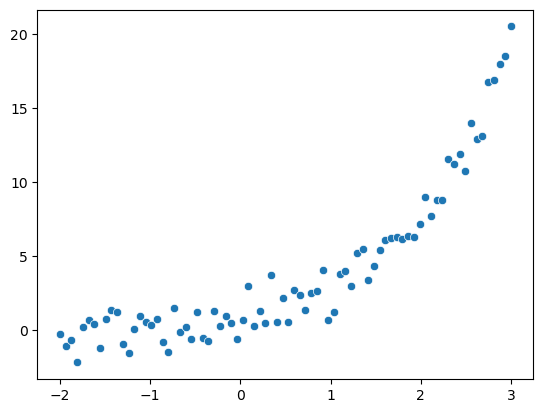

In [28]:
size = 80
x = np.linspace(-2, 3, num = size)

y = np.exp(x) + np.random.normal(size=size)

sns.scatterplot(x=x,y=y)

In [503]:
import numpy as np
from scipy.optimize import curve_fit

from matplotlib import pyplot as plt

size = 50
x = np.linspace(-10, 2, num = size)
y = np.linspace(0.02, 1.5, num = size)

X, Y = np.meshgrid(x,y)

# The coefficients are much bigger.
# z = -2.52 * np.log(0.1334 * X + 1e-8)*np.log(0.1* Y + 1e-8) + 0.5*np.random.normal(size=(size, size))

z = 10 - np.exp(X) + np.log(Y)

def test(data, a1,a2,b1,b2, c1,c2, d1,d2, e1,e2, x_off, y_off, z_off):
	x,y = data
	p = [a1,a2,b1,b2,c1,c2,d1,d2, e1,e2]

	return np.polyval(p, x + x_off) + np.polyval(p, y + y_off) + z_off

# testData = np.array([1,2])
# testParam = [0.2, 0.3, 0.12, 0.16, 8]
# testZ = test((X,Y), *testParam)
# print(testZ.shape)

p0 = np.random.randn(13)

param, param_cov = curve_fit(test, (X.ravel(),Y.ravel()), z.ravel(), p0=p0, maxfev=25000)

print("Function coefficients:")
print(param)
# print("Covariance of coefficients:")
# print(param_cov)

ans = test((X,Y), *param)

Function coefficients:
[ 3.37732066e-07  8.74130600e-06  1.44102199e-05 -1.34930348e-03
 -1.18144650e-02  4.00315168e-05  2.95744718e-01  5.35783541e-01
 -2.25413516e+00 -6.27936079e+06 -1.77790575e+00  2.27556906e+00
  1.25587235e+07]


`pip3 install ipympl`

/tmp/ipykernel_45201/2445530300.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


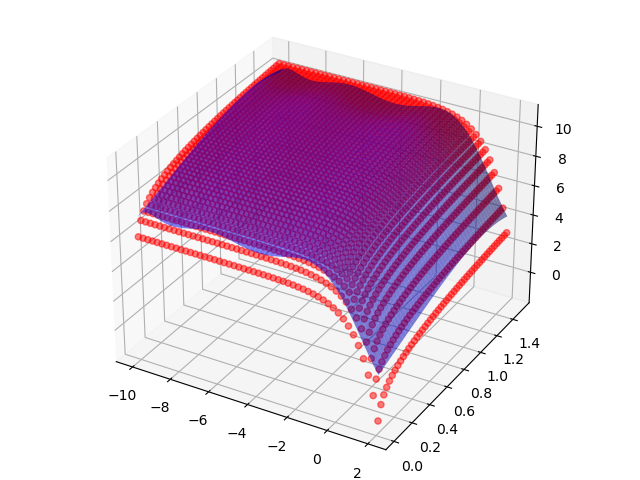

In [504]:
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib widget

# creating figure
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(X,Y, z, color ='red', label ="data", alpha=0.5)
ax.plot_surface(X,Y, ans, color ='blue', label ="test", alpha=0.5)
